# HSI exploration

## Library imports

### raster.io

In [86]:
import rasterio

In [128]:
import matplotlib.pyplot as plt
import matplotlib.colors

In [88]:
%matplotlib notebook

Traceback (most recent call last):
  File "/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 215, in process
    func(*args, **kwargs)
  File "/home/guillermo/anaconda3/envs/skoltech/lib/python3.6/site-packages/matplotlib/animation.py", line 1462, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [196]:
import numpy as np

## Loading the data

In [89]:
dataset_filename = 'DATA/Flight_01-08_OrthoVIS16_/OrthoVIS16.tif'

In [90]:
dataset = rasterio.open(dataset_filename)

In [92]:
print(f'The dataset {dataset.name} is a {dataset.width}x{dataset.height} image containing {len(dataset.indexes)} bands.')

The dataset DATA/Flight_01-08_OrthoVIS16_/OrthoVIS16.tif is a 7784x7954 image containing 18 bands


In [10]:
{i: dtype for i, dtype in zip(dataset.indexes, dataset.dtypes)}

{1: 'uint16',
 2: 'uint16',
 3: 'uint16',
 4: 'uint16',
 5: 'uint16',
 6: 'uint16',
 7: 'uint16',
 8: 'uint16',
 9: 'uint16',
 10: 'uint16',
 11: 'uint16',
 12: 'uint16',
 13: 'uint16',
 14: 'uint16',
 15: 'uint16',
 16: 'uint16',
 17: 'uint16',
 18: 'uint16'}

In [11]:
dataset.bounds

BoundingBox(left=45.4419705219378, bottom=61.42842706873281, right=45.485734695600044, top=61.449840180541)

In [12]:
dataset.crs

CRS({'init': 'epsg:4326'})

In [161]:
cm = matplotlib.colors.Colormap('inferno', N=256)
cm=plt.get_cmap('viridis')
cm.set_bad(color='k')

In [162]:
print(cm)

<IPython.core.display.Javascript object>


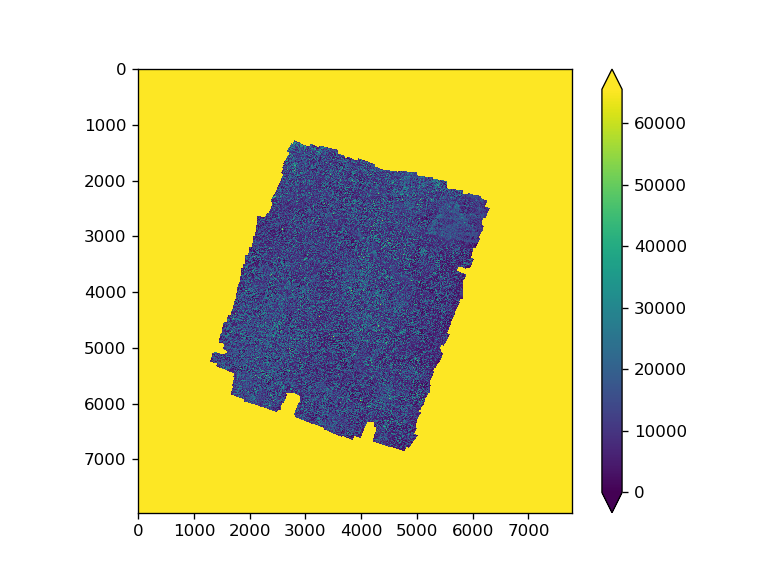

In [211]:
band1 = dataset.read(1)

plt.figure()
plt.imshow(band1,cmap=plt.cm.viridis)
plt.colorbar(extend='both')
#plt.clim(0, 50000);

### Dataset mask

The last channel (# 18) is the image mask that identifies regions of valid data values. 

<IPython.core.display.Javascript object>


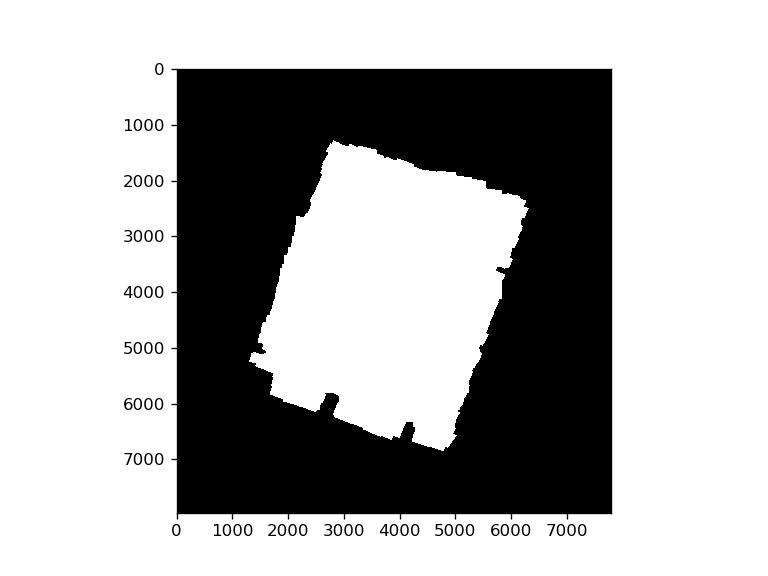

In [217]:
band16 = dataset.read(18)

plt.figure()
plt.imshow(band16,cmap=plt.cm.binary_r)

## One tree exploration

### Crop the image

In [255]:
with rasterio.open(dataset_filename) as src:
...     tree = src.read(src.indexes, window=Window(4680, 2890, 40, 40))[:-1]

<IPython.core.display.Javascript object>


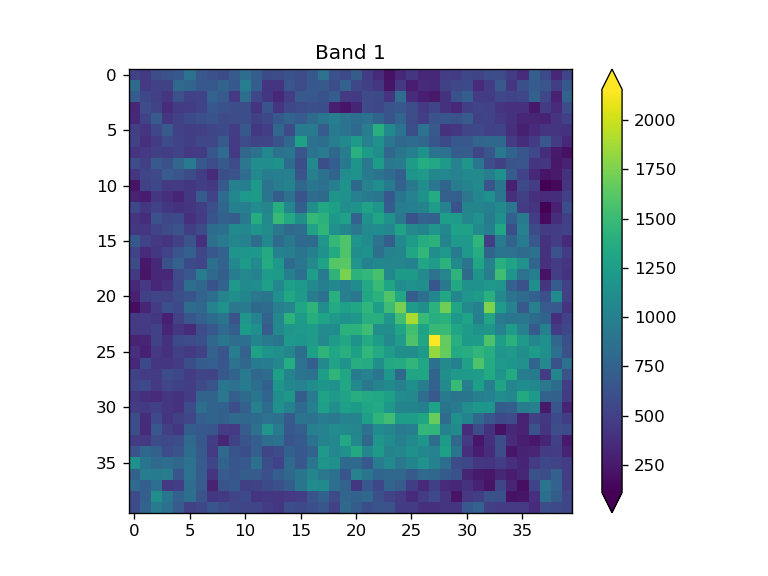

In [256]:
plt.figure()
plt.title(f'Band 1')
plt.imshow(tree[1])
plt.colorbar(extend='both')

### Features extraction

In [257]:
tree.shape

(17, 40, 40)

In [259]:
tree_p_b = tree.reshape(tree.shape[0],-1)
tree_p_b.shape

(17, 1600)

In [260]:
tree_avg = np.average(tree_p_b,axis=1)
tree_min = np.min(tree_p_b,axis=1)
tree_max = np.max(tree_p_b,axis=1)

In [263]:
bands = dataset.indexes[:-1]

<IPython.core.display.Javascript object>


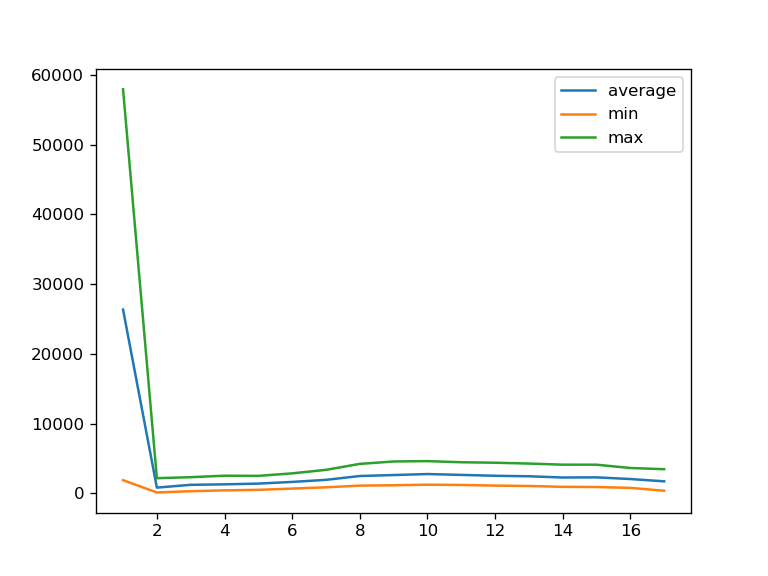

In [264]:
plt.figure()
plt.plot(bands,tree_avg, label = 'average')
plt.plot(bands,tree_min, label = 'min')
plt.plot(bands,tree_max, label = 'max')
plt.legend()

### Display all bands

<IPython.core.display.Javascript object>


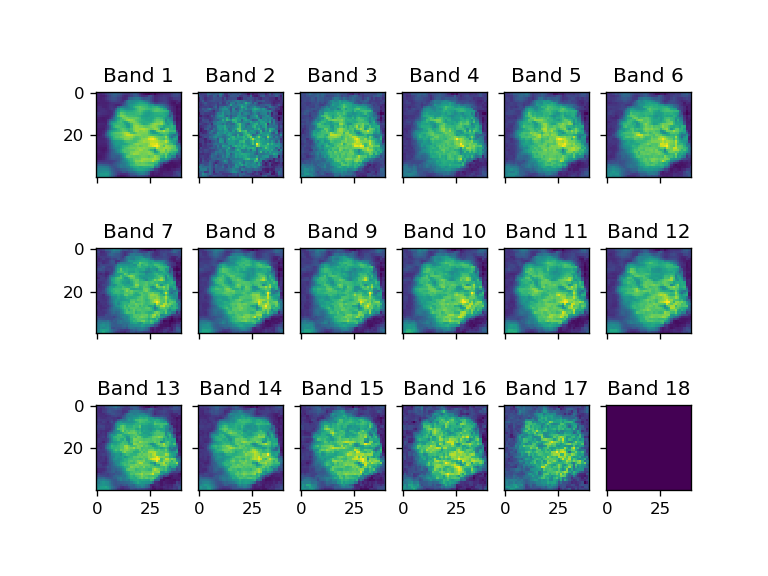

In [230]:
fig, axes = plt.subplots(3,6,sharex=True,sharey=True)
for i in range(len(dataset.indexes)):
    axes.flatten()[i].imshow(tree[i,:,:])
    axes.flatten()[i].set_title(f'Band {dataset.indexes[i]}')

### Animation

In [221]:
def remove_keymap_conflicts(new_keys_set):
    for prop in plt.rcParams:
        if prop.startswith('keymap.'):
            keys = plt.rcParams[prop]
            remove_list = set(keys) & new_keys_set
            for key in remove_list:
                keys.remove(key)

def multi_slice_viewer(volume):
    remove_keymap_conflicts({'j', 'k'})
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    fig.canvas.mpl_connect('key_press_event', process_key)
    ax.set_title(f'Band {ax.index+1}')

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])
    ax.set_title(f'Band {ax.index+1}')

def next_slice(ax):
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])
    ax.set_title(f'Band {ax.index+1}')

<IPython.core.display.Javascript object>


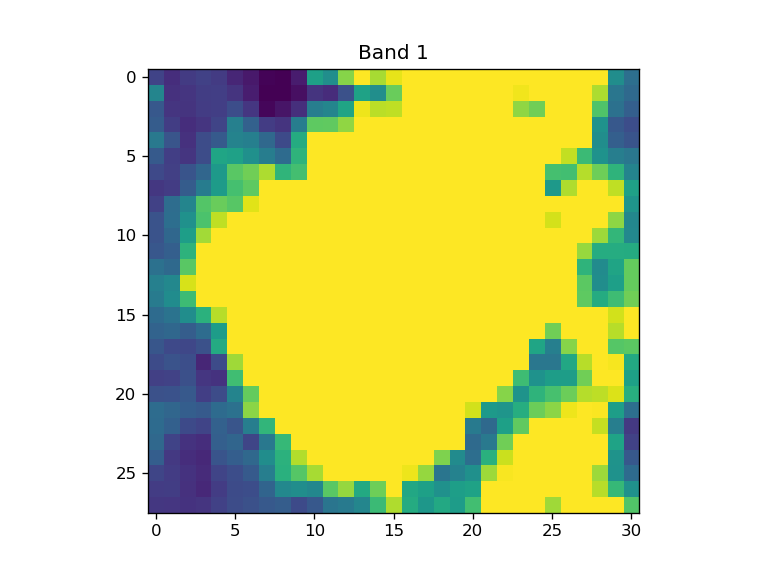

In [223]:
multi_slice_viewer(w[:17])

In [75]:
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


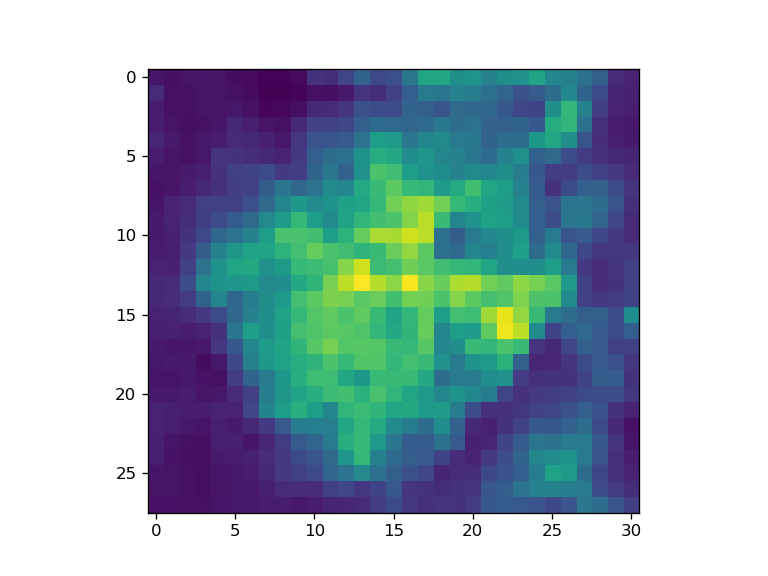

In [84]:

volume = w[:17]

fig = plt.figure()
im = plt.imshow(volume[0])
 
    
def animate(i):
    im.set_array(volume[i])
    im.set_norm()
    return im,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate,
                               frames=18, interval=100, blit=False)
plt.show()

In [82]:
im